In [1]:
import numpy as np
import matplotlib.pyplot as plt

## REGRESION LINEAL, ejemplo de horas de estudio y calificación.
<img src="01.png">

## Aplicamos a python

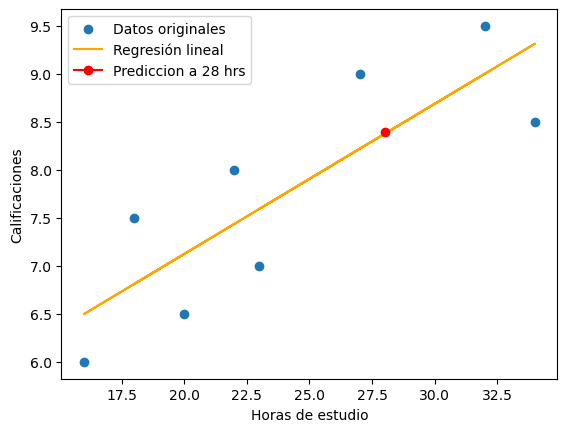

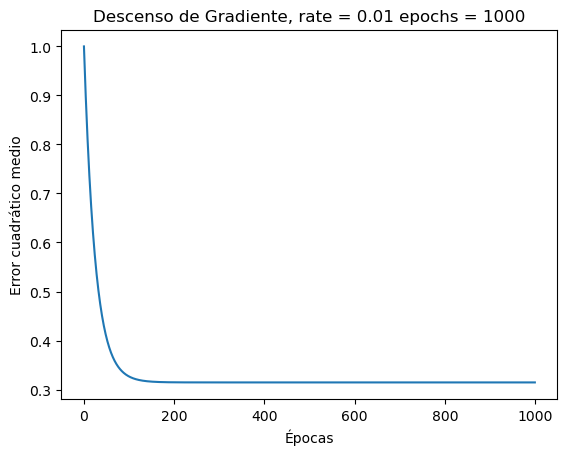

Coeficiente (pendiente): 0.8279221775792268
Intercepto: -1.443289932012703e-17


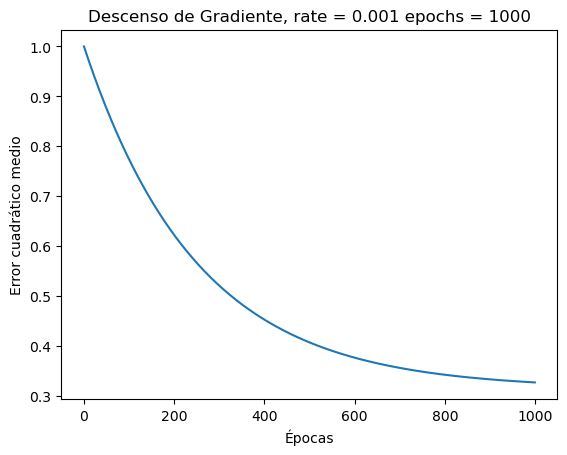

Coeficiente (pendiente): 0.7160992652466418
Intercepto: -4.218847493575598e-18


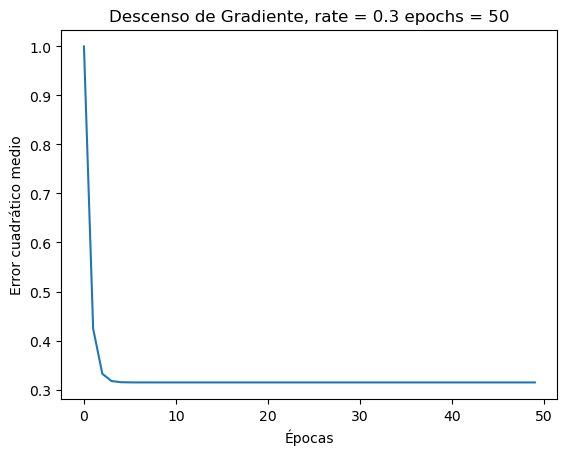

Coeficiente (pendiente): 0.827922178972593
Intercepto: 0.0


In [2]:
x = np.array([20, 16, 34, 23, 27, 32, 18, 22]) # horas de estudio
y = np.array([6.5, 6, 8.5, 7, 9, 9.5, 7.5, 8]) # calificaciones

# Normalizacion
x_mean = np.mean(x)
x_std = np.std(x)
y_mean = np.mean(y)
y_std = np.std(y)

x = (x - x_mean) / x_std
y = (y - y_mean) / y_std

def process_lineal(rate, epochs, lin):
    m = 0  # Pendiente inicial
    b = 0  # Intercepto inicial
    # Almacenar los valores de la función de costo en cada época
    cost_history = []

    # Realizar el descenso de gradiente con una tasa de aprendizaje grande
    n = len(x)
    for epoch in range(epochs):
        # Calcular las predicciones actuales
        y_pred = m * x + b
    
        # Calcular el error cuadrático medio
        cost = (1/n) * np.sum((y - y_pred) ** 2)
    
        # Calcular el gradiente de la función de costo (error cuadrático medio)
        dm = (-2/n) * np.sum(x * (y - y_pred))
        db = (-2/n) * np.sum(y - y_pred)
    
        # Actualizar los coeficientes usando el gradiente descendente con la tasa grande
        m -= rate * dm
        b -= rate * db
    
        # Almacenar el valor de la función de costo en esta época
        cost_history.append(cost)
        
    if(lin>0):
        # Mostramos la RL y tambien el punto del grafico con 28hrs
        plt.scatter(x * x_std + x_mean, y * y_std + y_mean, label='Datos originales')
        plt.plot(x * x_std + x_mean, y_pred * y_std + y_mean, color='orange', label='Regresión lineal')
        plt.plot(28,8.4, marker="o", color="red", label = "Prediccion a 28 hrs")
        plt.xlabel('Horas de estudio')
        plt.ylabel('Calificaciones')
        plt.legend()
        plt.savefig("lineal.jpg")
        plt.show()

    # Visualizar la disminución de la función de costo con la tasa de aprendizaje grande
    plt.plot(range(epochs), cost_history)
    plt.xlabel('Épocas')
    plt.ylabel('Error cuadrático medio')
    plt.title('Descenso de Gradiente, rate = ' + str(rate) + " epochs = " + str(epochs))
    plt.savefig(str(rate) + ".jpg")
    plt.show()
    
    # Coeficientes finales de la regresión
    print(f'Coeficiente (pendiente): {m}')
    print(f'Intercepto: {b}')
process_lineal(0.01, 1000, 1)
process_lineal(0.001, 1000, 0)
process_lineal(0.3, 50, 0)